# Comparing Change Values from two Datasets

In [2]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sub1 = "NevilleGoddard"
sub2 = "Nietzsche"

sub_df1 = pd.read_csv(f'{sub1}/{sub1}_mentalhealth_common_author_posts_CPTSD_evaluated.csv')
sub_df2 = pd.read_csv(f'{sub2}/{sub2}_mentalhealth_common_author_posts_CPTSD_evaluated.csv')
sub_df1.head()

,author,Polarity,Subjectivity,emp_help,emp_office,emp_dance,emp_money,emp_wedding,emp_domestic_work,emp_sleep,...,nrc_anger,nrc_anticip,nrc_trust,nrc_surprise,nrc_positive,nrc_negative,nrc_sadness,nrc_disgust,nrc_joy,nrc_anticipation
0,808sndheartbreakss,-1.227553e-17,1.556362e-16,1.929012e-17,0.0,0.0,0.000000e+00,0.000000e+00,0.0,3.858025e-17,...,-3.895121e-17,0.0,2.040302e-17,1.112892e-17,1.409663e-16,-7.604760e-17,-1.112892e-16,-2.596747e-17,8.346688e-17,8.346688e-17
1,Attakonspacelegolas2,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,...,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,BjorknBeans,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,...,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
3,CocoaBeanPiscesQueen,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,...,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
4,D-V-Ant,9.213572e-17,7.301481e-17,6.091618e-18,0.0,0.0,-1.078162e-17,6.091618e-18,0.0,0.000000e+00,...,-1.095887e-17,0.0,-3.589973e-18,-1.920951e-17,-1.385604e-17,2.361825e-17,-2.519280e-19,-1.385604e-17,-1.184061e-17,3.010539e-17


In [4]:
sub_df2.head()

,author,Polarity,Subjectivity,emp_help,emp_office,emp_dance,emp_money,emp_wedding,emp_domestic_work,emp_sleep,...,nrc_anger,nrc_anticip,nrc_trust,nrc_surprise,nrc_positive,nrc_negative,nrc_sadness,nrc_disgust,nrc_joy,nrc_anticipation
0,Apprehensive-Net6834,-4.755595e-18,-1.006315e-17,-8.084148e-19,0.000000e+00,0.000000e+00,0.000000e+00,-1.616830e-18,5.000504e-20,8.584198e-19,...,1.417948e-18,0.0,-4.072829e-18,1.749808e-18,-1.448117e-18,7.874135e-18,-1.870484e-18,-3.318601e-19,-1.870484e-18,7.542275e-19
1,Aristocrated,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,FairInvestigator,-9.380323e-18,-5.480358e-18,-1.046381e-18,7.956085e-19,-3.166170e-18,7.956085e-19,1.869016e-18,-1.097820e-18,-8.452128e-19,...,5.303107e-18,0.0,-1.634126e-17,1.259400e-18,-1.773811e-17,1.227132e-17,9.229724e-18,4.926383e-18,-1.012297e-17,3.895289e-18
3,Funny-Frame-4238,-8.048736e-18,4.393959e-18,-4.021742e-19,-1.749439e-19,0.000000e+00,-1.166293e-19,-8.103767e-19,-1.195122e-18,-1.923727e-19,...,3.189260e-18,0.0,-2.303291e-18,-2.364261e-20,-5.294470e-18,4.522114e-18,2.234320e-18,-7.500890e-19,-1.084393e-18,-3.815896e-19
4,Jakesteroz,3.476241e-16,-7.911247e-16,1.286008e-16,0.000000e+00,-9.645062e-17,0.000000e+00,0.000000e+00,1.286008e-16,0.000000e+00,...,-4.902906e-16,0.0,4.902906e-16,-2.371078e-16,4.902906e-16,-2.491641e-16,7.032858e-17,-2.371078e-16,2.411265e-16,3.215021e-16


In [5]:
# perform two-sided test. You can use 'greater' or 'less' for one-sided test
mannwhitney_dict_two_sided = {}

for col in sub_df1.columns[1:]:
    output = stats.mannwhitneyu(x=sub_df1[col], y= sub_df2[col], alternative = 'two-sided')
    mannwhitney_dict_two_sided[col] = output

mannwhitney_df_two_sided = pd.DataFrame.from_dict(mannwhitney_dict_two_sided, orient = 'index')
mannwhitney_df_two_sided.sort_values(by = 'pvalue', inplace = True)
mannwhitney_df_two_sided.head(10)

,statistic,pvalue
emp_fashion,357.5,0.014694
emp_celebration,353.0,0.023671
emp_car,543.5,0.034162
emp_home,575.0,0.035341
emp_philosophy,361.5,0.043281
emp_rural,555.5,0.044654
emp_warmth,539.0,0.045449
emp_movement,566.0,0.047490
emp_poor,563.5,0.053109
emp_torment,565.0,0.060549


In [6]:
# perform two-sided test. You can use 'greater' or 'less' for one-sided test
mannwhitney_dict_less = {}

for col in sub_df1.columns[1:]:
    output = stats.mannwhitneyu(x=sub_df1[col], y= sub_df2[col], alternative = 'less')
    mannwhitney_dict_less[col] = output

mannwhitney_df_less = pd.DataFrame.from_dict(mannwhitney_dict_less, orient = 'index')
mannwhitney_df_less.sort_values(by = 'pvalue', inplace = True)
mannwhitney_df_less.head(20)

,statistic,pvalue
emp_fashion,357.5,0.007347
emp_celebration,353.0,0.011835
emp_philosophy,361.5,0.021641
emp_payment,391.0,0.032623
emp_anger,371.0,0.033700
emp_plant,386.5,0.039246
emp_contentment,364.5,0.043595
emp_love,360.0,0.043714
emp_fight,372.0,0.047047
emp_war,388.0,0.056269


In [7]:
# perform two-sided test. You can use 'greater' or 'less' for one-sided test
mannwhitney_dict_greater = {}

for col in sub_df1.columns[1:]:
    output = stats.mannwhitneyu(x=sub_df1[col], y= sub_df2[col], alternative = 'greater')
    mannwhitney_dict_greater[col] = output

mannwhitney_df_greater = pd.DataFrame.from_dict(mannwhitney_dict_greater, orient = 'index')
mannwhitney_df_greater.sort_values(by = 'pvalue', inplace = True)
mannwhitney_df_greater.head(20)

,statistic,pvalue
emp_car,543.5,0.017081
emp_home,575.0,0.017671
emp_rural,555.5,0.022327
emp_warmth,539.0,0.022725
emp_movement,566.0,0.023745
emp_poor,563.5,0.026555
emp_torment,565.0,0.030275
emp_military,508.0,0.039434
emp_cooking,536.0,0.042326
emp_hiking,529.0,0.050440


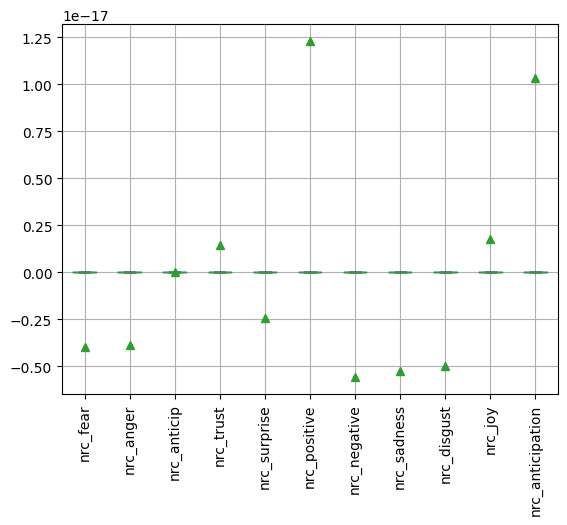

In [8]:
df = sub_df1.iloc[:, -11:]
df.boxplot(showfliers=False, showmeans=True)
plt.xticks(rotation=90)
plt.show()

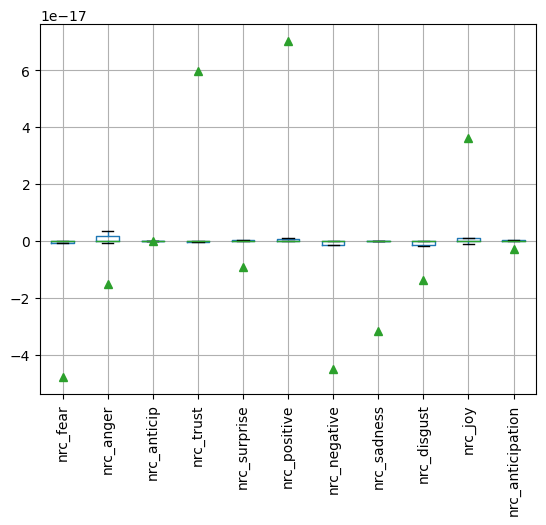

In [9]:
df2 = sub_df2.iloc[:, -11:]
df2.boxplot(showfliers=False, showmeans=True)
plt.xticks(rotation=90)
plt.show()

   Location Letter     value
0         1      A  0.917217
1         1      A  0.458046
2         1      A  0.709881
3         1      A  0.293898
4         1      A  0.575739


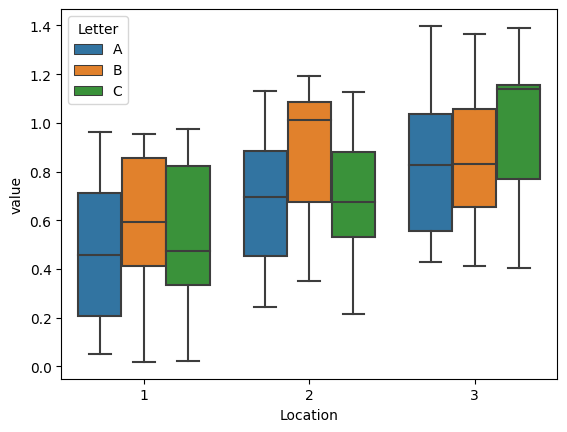

In [10]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


data1 = pd.DataFrame(np.random.rand(17,3), columns=['A','B','C']).assign(Location=1)
data2 = pd.DataFrame(np.random.rand(17,3)+0.2, columns=['A','B','C']).assign(Location=2)
data3 = pd.DataFrame(np.random.rand(17,3)+0.4, columns=['A','B','C']).assign(Location=3)

cdf = pd.concat([data1, data2, data3])    
mdf = pd.melt(cdf, id_vars=['Location'], var_name=['Letter'])
print(mdf.head())

#    Location Letter     value
# 0         1      A  0.223565
# 1         1      A  0.515797
# 2         1      A  0.377588
# 3         1      A  0.687614
# 4         1      A  0.094116

# mdf.boxplot()
ax = sns.boxplot(x="Location", y="value", hue="Letter", data=mdf)    
plt.show()